In [3]:
# importamos librerías
import pandas as pd
from datetime import datetime

# **Carga del archivo**

In [4]:
# cargamos el archivo con los datos
df_raw = pd.read_parquet("../data/reservas_hoteles.parquet")

In [5]:
# info del dataframe con los datos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_reserva       15098 non-null  object 
 1   id_cliente       15098 non-null  object 
 2   nombre           15098 non-null  object 
 3   apellido         15098 non-null  object 
 4   mail             15098 non-null  object 
 5   competencia      15098 non-null  bool   
 6   fecha_reserva    15098 non-null  object 
 7   inicio_estancia  15023 non-null  object 
 8   final_estancia   15023 non-null  object 
 9   id_hotel         15098 non-null  int64  
 10  precio_noche     9874 non-null   float64
 11  nombre_hotel     15098 non-null  object 
 12  estrellas        9926 non-null   float64
 13  ciudad           15098 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [6]:
# Hacemos copia del dataframe para trabajar
df = df_raw.copy()

# Cambio columnas con fechas a datetime

In [7]:
# Las columnas de fecha_reserva, inicio_estancia y final_estancia deberían estar en formato fecha. Hacemos una función para transformarlas.
def trans_fecha(lista_col, dataframe):
    for col in lista_col:
        dataframe[col] = pd.to_datetime(dataframe[col], errors="coerce")
    return dataframe

In [8]:
df = trans_fecha(["fecha_reserva", "inicio_estancia", "final_estancia"], df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       15098 non-null  object        
 1   id_cliente       15098 non-null  object        
 2   nombre           15098 non-null  object        
 3   apellido         15098 non-null  object        
 4   mail             15098 non-null  object        
 5   competencia      15098 non-null  bool          
 6   fecha_reserva    9926 non-null   datetime64[ns]
 7   inicio_estancia  15023 non-null  datetime64[ns]
 8   final_estancia   15023 non-null  datetime64[ns]
 9   id_hotel         15098 non-null  int64         
 10  precio_noche     9874 non-null   float64       
 11  nombre_hotel     15098 non-null  object        
 12  estrellas        9926 non-null   float64       
 13  ciudad           15098 non-null  object        
dtypes: bool(1), datetime64[ns](3), float64

# Fechas estancia

In [9]:
# miramos valores únicos de fechas de inicio y final de estancia porque las necesitaremos para buscar eventos en la API
ini_estancia =df["inicio_estancia"].unique()
ini_estancia

<DatetimeArray>
['2025-03-01 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [10]:
fin_estancia = df["final_estancia"].unique()
fin_estancia

<DatetimeArray>
['2025-03-02 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

Como las fechas son las mismas, podríamos rellenar toda la columna con el mismo valor.

In [11]:
# Rellenamos las columnas del df con las fechas.
df["inicio_estancia"] = ini_estancia[0]
df["final_estancia"] = fin_estancia[0]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15098 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       15098 non-null  object        
 1   id_cliente       15098 non-null  object        
 2   nombre           15098 non-null  object        
 3   apellido         15098 non-null  object        
 4   mail             15098 non-null  object        
 5   competencia      15098 non-null  bool          
 6   fecha_reserva    9926 non-null   datetime64[ns]
 7   inicio_estancia  15098 non-null  datetime64[ns]
 8   final_estancia   15098 non-null  datetime64[ns]
 9   id_hotel         15098 non-null  int64         
 10  precio_noche     9874 non-null   float64       
 11  nombre_hotel     15098 non-null  object        
 12  estrellas        9926 non-null   float64       
 13  ciudad           15098 non-null  object        
dtypes: bool(1), datetime64[ns](3), float64

In [13]:
df.sample(5)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
9392,bac6fabb-dd19-417a-861d-5e34117d4e81,7e74569e-230c-4faf-938e-12538ed35ec7,Feliciana,Albero,feliciana.albero@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,278.50,Hotel Vista Alegre,2.0,Madrid
11590,8e899d87-0f24-4c92-9dd6-03ee40cc6ad4,16939ff8-dca5-4383-97d6-254783169786,Demetrio,Campos,demetrio.campos@example.com,False,2025-02-09,2025-03-01,2025-03-02,15,107.13,Hotel Los Almendros,5.0,Madrid
3945,f3a0f3aa-0a4c-46c8-b6a8-da42a6e9b79a,b7b5baa3-366f-4c82-8005-7e878bc7afb0,Luis Miguel,Mancebo,luis miguel.mancebo@example.com,False,2025-02-09,2025-03-01,2025-03-02,29,115.74,Hotel Mirador Real,3.0,Madrid
3808,e1cf6c86-75cd-4acc-b634-d39359a56fb0,bcdb2a87-9ac8-4d16-bbeb-01b6a0a96519,Jose Angel,Tejedor,jose angel.tejedor@example.com,False,2025-02-08,2025-03-01,2025-03-02,36,395.90,Palacio del Sol,2.0,Madrid
1286,795ac8a9-e89f-4b3d-b035-6c184ae3dffb,896adb08-0bb8-4f3c-a531-8d0373c70739,Pancho,Ocaña,pancho.ocaña@example.com,False,2025-02-02,2025-03-01,2025-03-02,38,364.20,Hotel Palacio Imperial,3.0,Madrid


# Ciudades

In [14]:
ciudades = df["ciudad"].unique()
ciudades

array(['', 'Madrid'], dtype=object)

In [15]:
# Rellenamos toda la columna con Madrid.
df["ciudad"] = "Madrid"
df.sample(5)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
14353,1dccf800-0327-4ffc-8cf3-0f2cf9db3277,244b5974-e7fe-40d5-8610-4a86c2a816a2,Delia,Carpio,delia.carpio@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,Madrid
276,8bb4011e-ec87-451f-9c92-9b2804b3fb7c,946f2845-7809-43eb-b2f7-7b2a936fcb1b,Wilfredo,Belda,wilfredo.belda@example.com,False,2025-02-09,2025-03-01,2025-03-02,43,288.87,Hotel Mirador Real,2.0,Madrid
10038,90156b22-3191-466a-a86d-ea49ab0d44c9,f79211f5-abb9-4d83-96fc-425e7e189d21,Pascual,Folch,pascual.folch@example.com,False,2025-02-04,2025-03-01,2025-03-02,14,358.71,Hotel Las Estrellas,1.0,Madrid
155,edfdc0ed-e580-4373-9317-f56cd55f8ef9,95a60c70-ecc4-45ed-8e1b-dd976eb197af,Aarón,Mateu,aarón.mateu@example.com,False,2025-02-04,2025-03-01,2025-03-02,36,175.21,Hotel Los Almendros,3.0,Madrid
10975,99acbde8-98fb-4586-b850-e416229b29be,9debf577-960e-4c12-84a9-feee6da159aa,Hortensia,Vigil,hortensia.vigil@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,Madrid


In [16]:
df["ciudad"].unique()


array(['Madrid'], dtype=object)

# Duplicados

In [17]:
duplicados = df.duplicated()
duplicados.sum()

np.int64(98)

In [18]:
# Hay 98 filas totalmente duplicadas, las eliminamos
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       15000 non-null  object        
 1   id_cliente       15000 non-null  object        
 2   nombre           15000 non-null  object        
 3   apellido         15000 non-null  object        
 4   mail             15000 non-null  object        
 5   competencia      15000 non-null  bool          
 6   fecha_reserva    9828 non-null   datetime64[ns]
 7   inicio_estancia  15000 non-null  datetime64[ns]
 8   final_estancia   15000 non-null  datetime64[ns]
 9   id_hotel         15000 non-null  int64         
 10  precio_noche     9776 non-null   float64       
 11  nombre_hotel     15000 non-null  object        
 12  estrellas        9828 non-null   float64       
 13  ciudad           15000 non-null  object        
dtypes: bool(1), datetime64[ns](3), float64(2), 

# **Transformación**

De cara a cargar los datos en la base de datos vamos a generar unas tablas a partir del df.

In [19]:
# Podemos tener id_hotel duplicados porque más de un cliente puede reservar en el mismo hotel y podemos tener id_cliente duplicados porque el mismo cliente puede haber hecho varias reservas
# lo que no podemos tener repetido es el id_reserva. Lo comprobamos
reservas = df["id_reserva"].duplicated().sum()
reservas

np.int64(0)

## Hoteles

In [20]:
# Cantidad de id_hotel
df["id_hotel"].nunique()

29

In [21]:
# Cantidad nombres hotel
df["nombre_hotel"].nunique()

20

Hay discrepancia en la cantidad de valores únicos. Vamos a generar dos tablas de hoteles, una con los hoteles propios y otra con los de la competencia.

### Hoteles propios

In [22]:
df_propios = df[["id_hotel", "nombre_hotel" , "estrellas", "ciudad", "competencia"]][df["competencia"]==False]
df_propios.sample(5)

,id_hotel,nombre_hotel,estrellas,ciudad,competencia
506,14,Hotel Luz de Madrid,3.0,Madrid,False
3546,27,Hotel Monte Verde,1.0,Madrid,False
13559,43,Hotel Torre Dorada,4.0,Madrid,False
5456,29,Hotel Encanto Real,5.0,Madrid,False
11028,35,Hotel Torre Dorada,2.0,Madrid,False


In [23]:
df_propios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9828 entries, 2 to 14999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_hotel      9828 non-null   int64  
 1   nombre_hotel  9828 non-null   object 
 2   estrellas     9828 non-null   float64
 3   ciudad        9828 non-null   object 
 4   competencia   9828 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 393.5+ KB


In [24]:
# Comprobamos si hay hoteles con más de un id asignado
conteo_hoteles = df_propios.groupby("nombre_hotel")["id_hotel"].nunique().reset_index()
conteo_hoteles

,nombre_hotel,id_hotel
0,Gran Hotel Madrid,19
1,Hotel Brisas del Mar,19
2,Hotel Camino del Sol,19
3,Hotel Costa Azul,19
4,Hotel Encanto Real,19
5,Hotel Jardines del Rey,19
6,Hotel Las Estrellas,19
7,Hotel Los Almendros,19
8,Hotel Luz de Madrid,19
9,Hotel Maravilla Real,19


Todos los hoteles tienen 19 id asignados, lo que no puede ser correcto. Vamos a asociar un único id_hotel por cada nombre_hotel

In [25]:
nombrespropios = list(df_propios["nombre_hotel"].unique())

In [26]:
# Crear una lista de números seriales según la cantidad de hoteles propios
idspropios = list(range(1, len(nombrespropios)+1))
# Asignar números seriales a cada elemento. Lo hacemos como un diccionario para poder hacer un mapeo en el df_propios
hoteles_propios = dict(zip(nombrespropios, idspropios))
hoteles_propios

{'Hotel Monte Verde': 1,
 'Hotel Brisas del Mar': 2,
 'Hotel Camino del Sol': 3,
 'Hotel Puerta del Cielo': 4,
 'Hotel Encanto Real': 5,
 'Palacio del Sol': 6,
 'Hotel Jardines del Rey': 7,
 'Hotel Las Estrellas': 8,
 'Gran Hotel Madrid': 9,
 'Hotel Torre Dorada': 10,
 'Hotel Palacio Imperial': 11,
 'Hotel Luz de Madrid': 12,
 'Hotel Los Almendros': 13,
 'Hotel Sol y Luna': 14,
 'Hotel Mirador Real': 15,
 'Hotel Rincón Sereno': 16,
 'Hotel Vista Alegre': 17,
 'Hotel Costa Azul': 18,
 'Hotel Maravilla Real': 19}

In [27]:
df_propios["id_hotel"] = df_propios["nombre_hotel"].map(hoteles_propios)
df_propios.sample(5)

,id_hotel,nombre_hotel,estrellas,ciudad,competencia
14230,17,Hotel Vista Alegre,2.0,Madrid,False
8813,6,Palacio del Sol,3.0,Madrid,False
1493,10,Hotel Torre Dorada,5.0,Madrid,False
8833,19,Hotel Maravilla Real,4.0,Madrid,False
1474,18,Hotel Costa Azul,1.0,Madrid,False


La columna estrellas se supone que se refiere a la clasificación del hotel, por lo que cada hotel debería tener una clasificación única. Lo comprobamos

In [28]:
conteo_estrellas = df_propios.groupby("nombre_hotel")["estrellas"].nunique().reset_index()
conteo_estrellas

,nombre_hotel,estrellas
0,Gran Hotel Madrid,5
1,Hotel Brisas del Mar,5
2,Hotel Camino del Sol,5
3,Hotel Costa Azul,5
4,Hotel Encanto Real,5
5,Hotel Jardines del Rey,5
6,Hotel Las Estrellas,5
7,Hotel Los Almendros,5
8,Hotel Luz de Madrid,5
9,Hotel Maravilla Real,5


Vemos cada hotel tiene 5 clasificaciones distintas, lo que no tendría sentido. Vamos a suponer que se trata de la valoración de los clientes, por lo que tomaremos el valor medio de cada hotel.

In [29]:
# Cambiamos el nombre de la columna
df_propios.rename(columns={"estrellas":"valoracion"}, inplace=True)

In [30]:
# Calculamos la valoracion media por cada nombre de hotel y redondeamos a 1 decimal
df_valoracion_propios = round(df_propios.groupby("nombre_hotel")["valoracion"].mean().reset_index(),1)
df_valoracion_propios

,nombre_hotel,valoracion
0,Gran Hotel Madrid,3.1
1,Hotel Brisas del Mar,3.1
2,Hotel Camino del Sol,3.1
3,Hotel Costa Azul,3.1
4,Hotel Encanto Real,3.0
5,Hotel Jardines del Rey,2.9
6,Hotel Las Estrellas,2.9
7,Hotel Los Almendros,3.0
8,Hotel Luz de Madrid,3.1
9,Hotel Maravilla Real,3.0


In [31]:
def generar_mapa(col1, col2, dataframe):
    """
    Genera un diccionario a partir de los valores de dos columnas de un DataFrame, generando pares clave:valor por cada fila.

    Parámetros:
    col1 (str): Nombre de la primera columna que se usará como claves del diccionario.
    col2 (str): Nombre de la segunda columna que se usará como valores del diccionario.
    dataframe (pandas.DataFrame): El DataFrame que contiene las columnas a mapear.

    Retorna:
    dict: Un diccionario donde las claves son los valores de la columna col1 y los valores son los valores de la columna col2.
    """
    lista_col1 = []
    lista_col2 = []
    for i in dataframe[col1]:
        lista_col1.append(i)
    for f in dataframe[col2]:
        lista_col2.append(f)

    mapa = dict(zip(lista_col1, lista_col2))
    return mapa

In [32]:
# generamos un diccionario con los nombres de los hoteles y su valoración media
valoracion_propios = generar_mapa("nombre_hotel", "valoracion", df_valoracion_propios)

In [33]:
# Usamos el diccionario para mapear el df de hoteles propios y corregir la columna de estrellas
df_propios["valoracion"] = df_propios["nombre_hotel"].map(valoracion_propios)
df_propios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9828 entries, 2 to 14999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_hotel      9828 non-null   int64  
 1   nombre_hotel  9828 non-null   object 
 2   valoracion    9828 non-null   float64
 3   ciudad        9828 non-null   object 
 4   competencia   9828 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 393.5+ KB


### Hoteles competencia

In [34]:
competencia = df[["id_hotel", "nombre_hotel", "estrellas", "ciudad", "competencia"]][df["competencia"]==True]
competencia.sample(5)

,id_hotel,nombre_hotel,estrellas,ciudad,competencia
2107,114,,NaN,Madrid,True
1378,181,,NaN,Madrid,True
6679,131,,NaN,Madrid,True
5101,181,,NaN,Madrid,True
6159,186,,NaN,Madrid,True


In [35]:
# Cambiamos el nombre de la columna
competencia.rename(columns={"estrellas":"valoracion"}, inplace=True)

In [36]:
competencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5172 entries, 0 to 14998
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_hotel      5172 non-null   int64  
 1   nombre_hotel  5172 non-null   object 
 2   valoracion    0 non-null      float64
 3   ciudad        5172 non-null   object 
 4   competencia   5172 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 207.1+ KB


In [37]:
ids_competencia = (competencia["id_hotel"].unique()).tolist()

Los datos que faltan los extraemos por scrapeo

In [38]:
info_competencia = pd.read_pickle("hoteles_competencia.pkl")
info_competencia

,nombre,valoracion,precio,fecha_reserva
0,ibis Styles Madrid Prado,4.7,179.0,2025-02-20
1,ibis budget Madrid Calle 30,4.4,106.0,2025-02-20
2,ibis Madrid Centro las Ventas,4.5,181.0,2025-02-20
3,ibis budget Madrid Centro las Ventas,4.3,119.0,2025-02-20
4,ibis budget Madrid Vallecas,4.3,102.0,2025-02-20
5,ibis Madrid Aeropuerto Barajas,4.4,129.0,2025-02-20
6,ibis Madrid Alcorcon Tresaguas,4.4,95.0,2025-02-20
7,ibis budget Madrid Aeropuerto,4.0,97.0,2025-02-20
8,ibis Madrid Alcobendas,4.4,89.0,2025-02-20
9,ibis budget Madrid Alcorcon Móstoles,4.5,77.0,2025-02-20


In [39]:
info_competencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nombre         10 non-null     object        
 1   valoracion     10 non-null     float64       
 2   precio         10 non-null     float64       
 3   fecha_reserva  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 452.0+ bytes


In [40]:
info_competencia["id_hotel"] = ids_competencia
info_competencia["ciudad"] = "Madrid"
info_competencia

,nombre,valoracion,precio,fecha_reserva,id_hotel,ciudad
0,ibis Styles Madrid Prado,4.7,179.0,2025-02-20,113,Madrid
1,ibis budget Madrid Calle 30,4.4,106.0,2025-02-20,194,Madrid
2,ibis Madrid Centro las Ventas,4.5,181.0,2025-02-20,131,Madrid
3,ibis budget Madrid Centro las Ventas,4.3,119.0,2025-02-20,114,Madrid
4,ibis budget Madrid Vallecas,4.3,102.0,2025-02-20,103,Madrid
5,ibis Madrid Aeropuerto Barajas,4.4,129.0,2025-02-20,181,Madrid
6,ibis Madrid Alcorcon Tresaguas,4.4,95.0,2025-02-20,128,Madrid
7,ibis budget Madrid Aeropuerto,4.0,97.0,2025-02-20,186,Madrid
8,ibis Madrid Alcobendas,4.4,89.0,2025-02-20,135,Madrid
9,ibis budget Madrid Alcorcon Móstoles,4.5,77.0,2025-02-20,117,Madrid


In [41]:
info_competencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   nombre         10 non-null     object        
 1   valoracion     10 non-null     float64       
 2   precio         10 non-null     float64       
 3   fecha_reserva  10 non-null     datetime64[ns]
 4   id_hotel       10 non-null     int64         
 5   ciudad         10 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 612.0+ bytes


In [42]:
df_competencia = info_competencia[["id_hotel", "nombre", "valoracion", "ciudad"]]
df_competencia["competencia"] = True
df_competencia.rename(columns={"nombre" : "nombre_hotel"}, inplace = True)
df_competencia

C:\Users\marta\AppData\Local\Temp\ipykernel_20052\244128482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_competencia["competencia"] = True
C:\Users\marta\AppData\Local\Temp\ipykernel_20052\244128482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_competencia.rename(columns={"nombre" : "nombre_hotel"}, inplace = True)


,id_hotel,nombre_hotel,valoracion,ciudad,competencia
0,113,ibis Styles Madrid Prado,4.7,Madrid,True
1,194,ibis budget Madrid Calle 30,4.4,Madrid,True
2,131,ibis Madrid Centro las Ventas,4.5,Madrid,True
3,114,ibis budget Madrid Centro las Ventas,4.3,Madrid,True
4,103,ibis budget Madrid Vallecas,4.3,Madrid,True
5,181,ibis Madrid Aeropuerto Barajas,4.4,Madrid,True
6,128,ibis Madrid Alcorcon Tresaguas,4.4,Madrid,True
7,186,ibis budget Madrid Aeropuerto,4.0,Madrid,True
8,135,ibis Madrid Alcobendas,4.4,Madrid,True
9,117,ibis budget Madrid Alcorcon Móstoles,4.5,Madrid,True


In [43]:
df_competencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_hotel      10 non-null     int64  
 1   nombre_hotel  10 non-null     object 
 2   valoracion    10 non-null     float64
 3   ciudad        10 non-null     object 
 4   competencia   10 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 462.0+ bytes


In [44]:
#unimos los dos dataframes de hoteles
df_hoteles = pd.concat([df_propios, df_competencia], axis = 0)
df_hoteles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9838 entries, 2 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_hotel      9838 non-null   int64  
 1   nombre_hotel  9838 non-null   object 
 2   valoracion    9838 non-null   float64
 3   ciudad        9838 non-null   object 
 4   competencia   9838 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 393.9+ KB


In [45]:
valoracion_hoteles = generar_mapa("nombre_hotel", "valoracion", df_hoteles)
nombres_id_hoteles = generar_mapa("nombre_hotel", "id_hotel", df_hoteles)
nombres_competencia = generar_mapa("id_hotel", "nombre_hotel", df_competencia)
precios_competencia = generar_mapa("nombre", "precio", info_competencia)

## Clientes

Como podemos tener dos clientes con el mismo nombre, tomaremos el mail de cliente como el valor único de cliente. Es posible que tengamos un mismo cliente que haya hecho vrias reservas, por lo que encontrar el mismo id_cliente varias veces tampoco indicaría error. Vamos a comprobar si el número de valores únicos de id_cliente se corresponde con el número de valores únicos de mail. De no ser así, podría indicar un error en la asignación de id_cliente que debemos corregir

In [46]:
df["id_cliente"].nunique()

14847

In [47]:
df["mail"].nunique()

14905

Vemos que hay más valores de mail que de id_cliente, lo que sugiere que más de un cliente tiene el mismo id. Vamos a corregir el id de la misma forma que hemos corregido los id_hotel.

In [48]:
df_clientes = df[["id_cliente", "nombre", "apellido", "mail"]]
df_clientes.sample(5)

,id_cliente,nombre,apellido,mail
6373,46ba268f-97fd-474d-911a-3b0f8ca76098,Leocadia,Machado,leocadia.machado@example.com
6962,0c3bdb30-5865-43b9-aeae-d925d2aa0968,Marciano,Peñas,marciano.peñas@example.com
13468,bbc263e0-b922-433f-ac24-9ad860dc4d90,Dominga,Clavero,dominga.clavero@example.com
11439,38a72a6c-ac3a-46e7-87bb-69c25fc757ed,Rebeca,Estevez,rebeca.estevez@example.com
13407,0318460a-5f3a-4a9f-bf2a-befd45f8d936,Nidia,Escrivá,nidia.escrivá@example.com


In [49]:
mails=df_clientes["mail"].unique()

In [50]:
mailcliente=[]
idcliente=[]
for mail in enumerate(mails, start=1):
    mailcliente.append(mail[1])
    idcliente.append(f"cliente_{mail[0]}")
mail_cliente = dict(zip(mailcliente, idcliente))

In [51]:
df_clientes.loc[:, "id_cliente"] = df_clientes["mail"].map(mail_cliente)
df_clientes.sample(5)

,id_cliente,nombre,apellido,mail
13577,cliente_13501,Clemente,Mínguez,clemente.mínguez@example.com
14184,cliente_14100,Eufemia,Gallo,eufemia.gallo@example.com
9697,cliente_9658,Gil,Bartolomé,gil.bartolomé@example.com
3662,cliente_3658,Paco,Rius,paco.rius@example.com
6815,cliente_6794,Celso,Elorza,celso.elorza@example.com


## Reservas

In [52]:
# Renombramos la columna estrellas por valoracion
df.rename(columns = {"estrellas": "valoracion"}, inplace = True)
#df.rename(columns = {"estrellas": "ESTRELLAS", "id_hotel" : "ID_HOTEL", "nombre_hotel": "NOMBRE_HOTEL", "precio_noche": "PRECIO"}, inplace =  True)

In [53]:
# La fecha de reserva para los hoteles de la competencia es la del scrapeo. Lo actualizamos
df.loc[df["competencia"]==True, "fecha_reserva"] = info_competencia["fecha_reserva"][0]
df["id_cliente"] = df["mail"].map(mail_cliente)
df.loc[df["competencia"]==False, "id_hotel"] = df["nombre_hotel"].map(hoteles_propios)
df.loc[df["competencia"] == True, "nombre_hotel"] = df["id_hotel"].map(nombres_competencia)
df.loc[df["competencia"] == True, "precio_noche"] = df["nombre_hotel"].map(precios_competencia)
df["valoracion"] = df["nombre_hotel"].map(valoracion_hoteles)

In [54]:
df.sample(5)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
3472,6fcdd18d-6f55-472b-a340-4d0d7c479570,cliente_3468,Rómulo,Uría,rómulo.uría@example.com,False,2025-02-09,2025-03-01,2025-03-02,4,204.06,Hotel Puerta del Cielo,3.0,Madrid
9263,b0181813-63cf-4070-9683-7b78328bfc52,cliente_9227,Isaac,Cerezo,isaac.cerezo@example.com,False,2025-02-09,2025-03-01,2025-03-02,10,NaN,Hotel Torre Dorada,2.9,Madrid
3463,ffa8ee27-05a2-437a-a297-8c1240d3145b,cliente_3459,Fabio,Arranz,fabio.arranz@example.com,True,2025-02-20,2025-03-01,2025-03-02,135,89.00,ibis Madrid Alcobendas,4.4,Madrid
5982,e9b956ee-5e5b-45e0-851e-939fbb055657,cliente_5967,Marcia,Garcia,marcia.garcia@example.com,False,2025-02-02,2025-03-01,2025-03-02,8,131.78,Hotel Las Estrellas,2.9,Madrid
5600,e0d1382d-68cb-4586-abc8-6377b71936ed,cliente_5589,Eloísa,Juan,eloísa.juan@example.com,False,2025-02-02,2025-03-01,2025-03-02,8,436.00,Hotel Las Estrellas,2.9,Madrid


In [55]:
df_reservas = df[["id_reserva", "fecha_reserva", "inicio_estancia", "final_estancia", "precio_noche", "id_cliente", "id_hotel"]]

In [68]:
df_precios = df_reservas[["id_hotel", "precio_noche"]]

In [58]:
# Hacemos boxplot de los precios por hotel
import matplotlib.pyplot as plt
import seaborn as sns

NameError: name 'np' is not defined

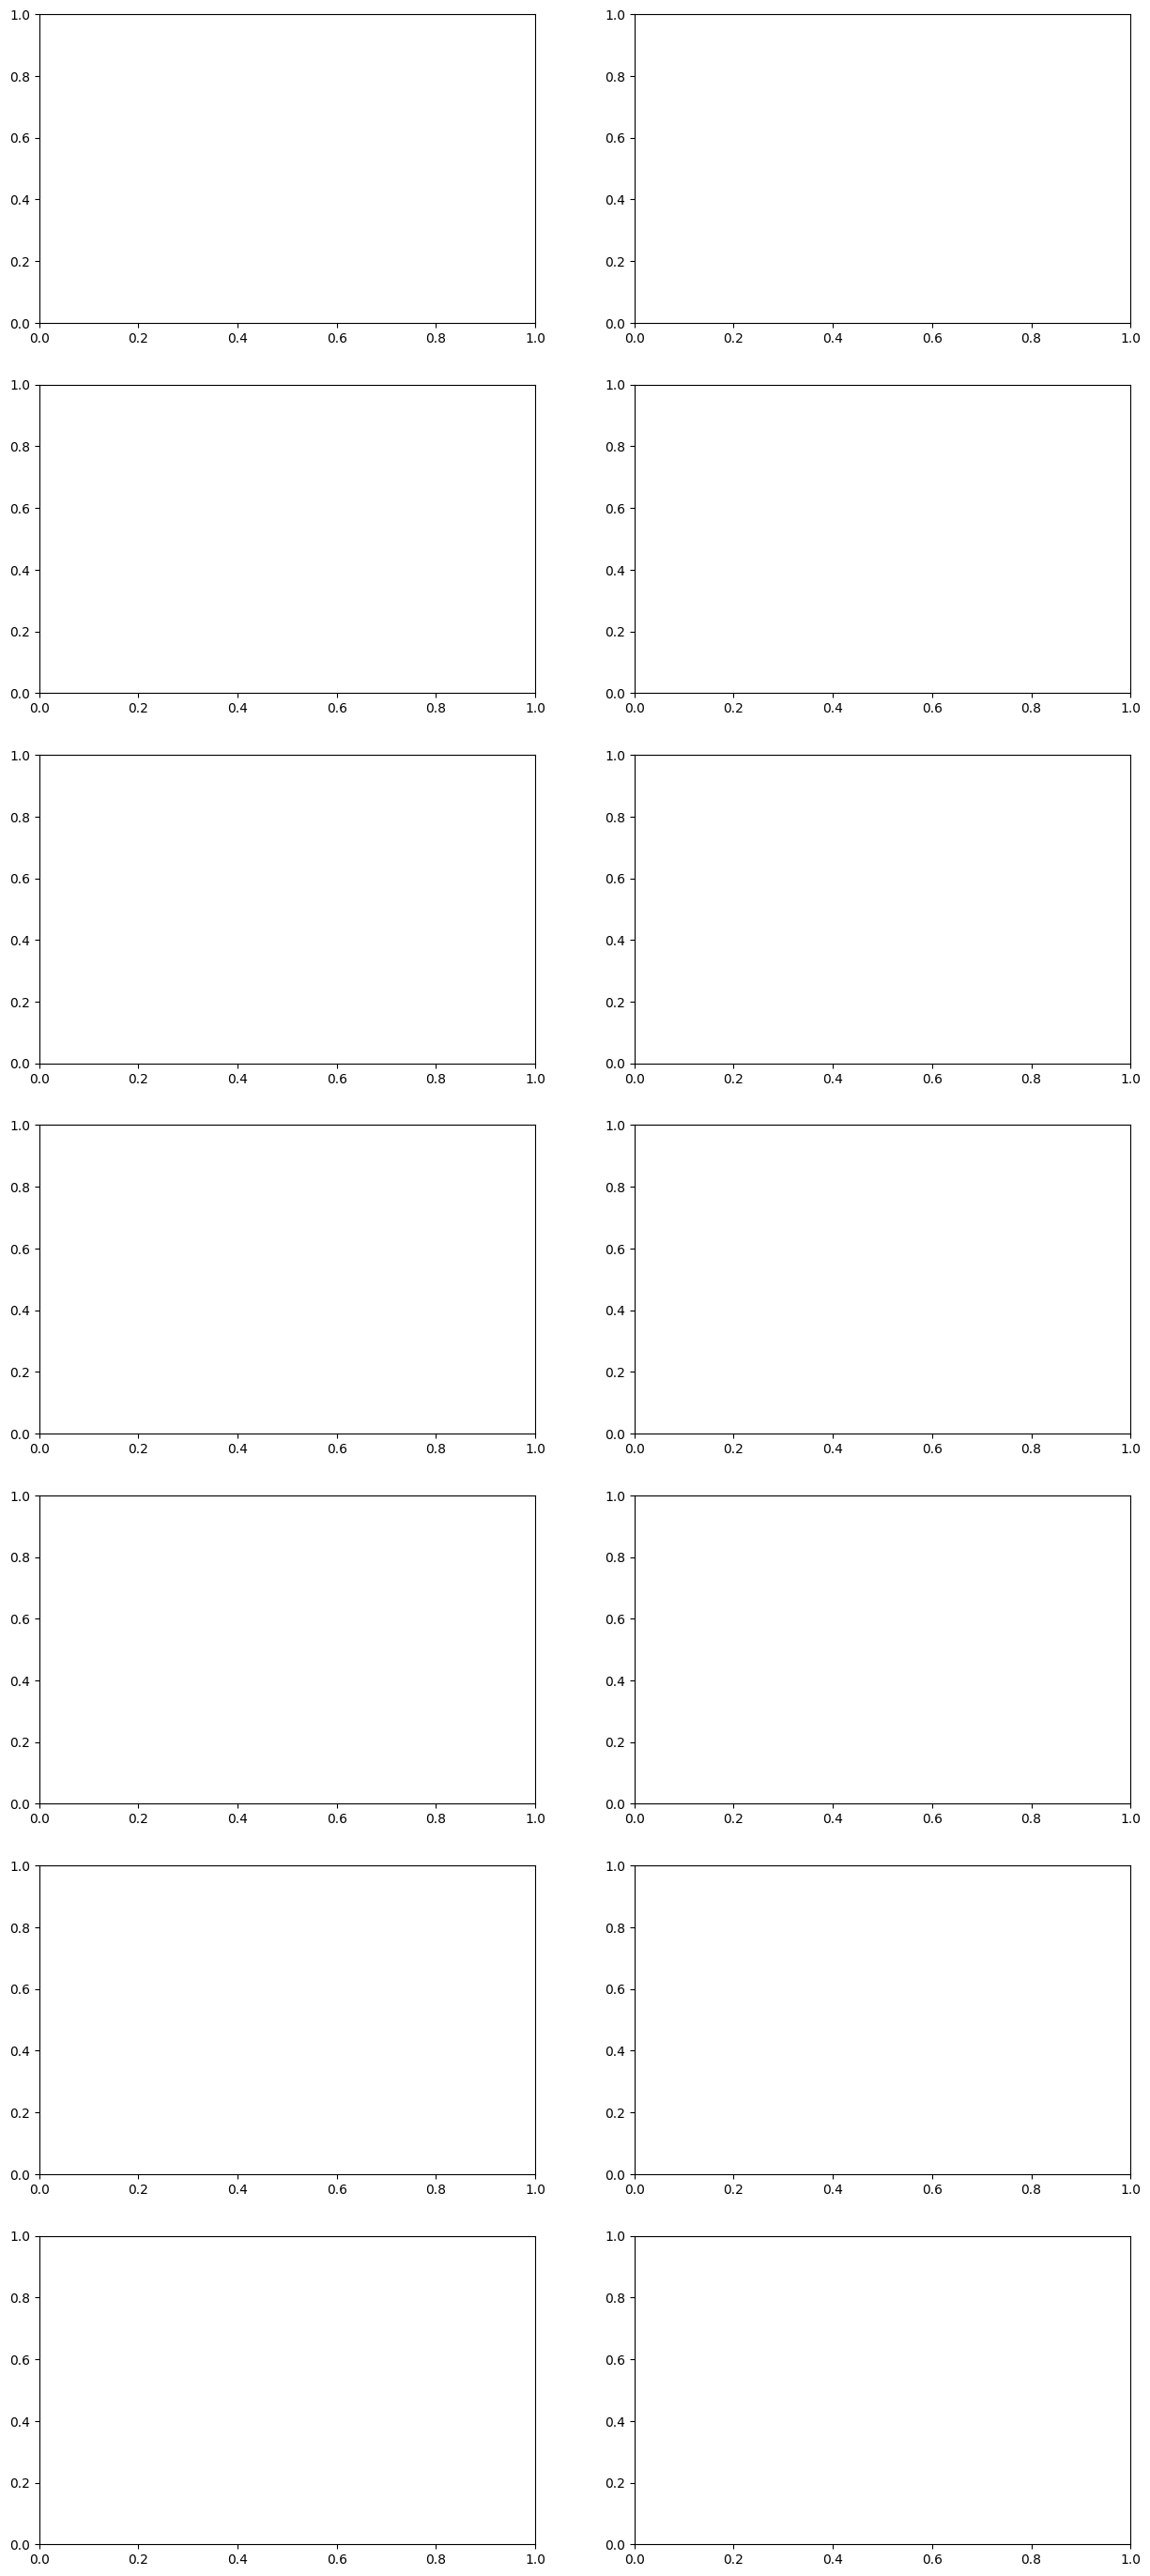

In [59]:
# Definir la cantidad de columnas por fila
cols_per_row = 2
num_cols = len(df.columns)
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)  # Calcular filas necesarias

# Crear subplots dinámicamente
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))

# Asegurar que axes es un array 2D
axes = np.array(axes).reshape(num_rows, cols_per_row)

# Dibujar los boxplots en cada subplot
for i, col in enumerate(df.columns):
    row, col_idx = divmod(i, cols_per_row)  # Obtener la posición en la grilla
    sns.boxplot(y=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot de {col}')

In [ ]:
def boxplots (dataframe, columnax, columnay):